#### Objectif challenge :
   - Comprendre et prédire la toxicité dans une vidéo youtube 
    - il s'agira de :
       * Où et quand l'agressivité en ligne est retrouvée( A quel moment parle t-on de contenu toxique dans un commentaire de vidéo?)
       * Les facteurs qui la limitent 
       * Les facteurs qui la favorisent
    - Deux approches de résolution du problème
      * Approche par régression 
           * prédire le nombre d'insultes(variable discrète) présentes dans les commentaires associés à une vidéo
      * Approche par classification
           * Création d'un nouvel indice(nouvelle variable) pour décrire la toxicité 

### I. Statistiques descriptives

##### 1. Librairie

In [62]:
# Importation des librairies à utiliser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### 2. Chargement des données

In [63]:
#chargement des données
path="/Users/macbook/Desktop/3A/UE_Coeur_A/challenge_2/Archive/challenge_youtube_toxic.csv"
#path="C:/Users/dell/Downloads/FML/Challenge supervisé/challenge_youtube_toxic.csv"
data=pd.read_csv(path,sep=";")

In [64]:
#Visualisation des données
data

video_id_court                                          video_id  \
0        Uvvsvw_wxOs  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLlV2dnN2d193eE9z   
1        mCy1ZBdttwA  VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLm1DeTFaQmR0dHdB   
2        iU3MyHMK5nU  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLmlVM015SE1LNW5V   
3        ZUim3AeURtk  VVViWjBDc3I5b3c2WGprZGQ1NDJPbWh3LlpVaW0zQWVVUnRr   
4        n5Tg2vhLCAM  VVVoWldzNlBKWTBoTkQzODRkMl9ScmhRLm41VGcydmhMQ0FN   
...              ...                                               ...   
46097    0s_hwJrt_6E  VVVmSG5fOC1laGRlbTg2ZkV2bEZnLUd3LjBzX2h3SnJ0XzZF   
46098    ktsFSiFN1VY  VVVZcFJEbmhrNUg4aDE2anBTODR1cXNBLmt0c0ZTaUZOMVZZ   
46099    -Zl5CiKdfAs  VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLi1abDVDaUtkZkFz   
46100    CyHXcpFlrTg  VVVDRHpfWFllS1dkME9JeWpwOTVkcXlRLkN5SFhjcEZsclRn   
46101    vN2AzKn58OE  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLnZOMkF6S241OE9F   

                     channel_id  nbrMot  nbrMotInsulte  nbrMotAllong  \
0      UC9GGzAhhvhJO1hL10-BcgNA    3813             18             4   
1      UCXKJrYczY2_fJEZgFPGY0HQ      28              2             0   
2      UC9GGzAhhvhJO1hL10-BcgNA    3804             68             9   
3      UCbZ0Csr9ow6Xjkdd542Omhw       4              0             1   
4      UChZWs6PJY0hND384d2_RrhQ     737              3             1   
...                         ...     ...            ...           ...   
46097  UCfHn_8-ehdem86fEvlFg-Gw      16              0             0   
46098  UCYpRDnhk5H8h16jpS84uqsA     228              1             1   
46099  UCXKJrYczY2_fJEZgFPGY0HQ     287              2             0   
46100  UCCDz_XYeKWd0OIyjp95dqyQ     176              0             0   
46101  UC9GGzAhhvhJO1hL10-BcgNA   16608            152            66   

       nbrMotMAJ  nbrExclMark  nbrQuestMark nbrMotMoyenne  ...  \
0            145           79            60       30,2619  ...   
1              1            0             0      9,333333  ...   
2             56           75            54      27,56522  ...   
3              2            0             0             2  ...   
4             18            5             6   32,04347826  ...   
...          ...          ...           ...           ...  ...   
46097          0            3             0   5,333333333  ...   
46098          0            0             1           228  ...   
46099          3            2             0        35,875  ...   
46100          0            6             3      58,66667  ...   
46101        335          177           179      22,50407  ...   

      discussion_count distinct_authors_count authors_3channels_count  \
0                   28                     58                      47   
1                    0                      3                       1   
2                   22                     83                      49   
3                    0                      2                       0   
4                    4                     18                       7   
...                ...                    ...                     ...   
46097                0                      3                       1   
46098                0                      1                       0   
46099                0                      7                       5   
46100                1                      3                       0   
46101               48                    440                     278   

      liked_authors_count channel_name  subscriberCount  viewCount  \
0                      23   LeHuffPost           339922  225393312   
1                       0        CNEWS           189971  132125693   
2                      36   LeHuffPost           339922  225393312   
3                       0   Telegramme             2862    2481100   
4                       7    Les Echos            30010    6710737   
...                   ...          ...              ...        ...   
46097                   0  Le Parisien           149018   85536183   
46098                 

- On fait une copie des données pour l'analyse descriptive

In [65]:
df=data.copy()

In [66]:
df

video_id_court                                          video_id  \
0        Uvvsvw_wxOs  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLlV2dnN2d193eE9z   
1        mCy1ZBdttwA  VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLm1DeTFaQmR0dHdB   
2        iU3MyHMK5nU  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLmlVM015SE1LNW5V   
3        ZUim3AeURtk  VVViWjBDc3I5b3c2WGprZGQ1NDJPbWh3LlpVaW0zQWVVUnRr   
4        n5Tg2vhLCAM  VVVoWldzNlBKWTBoTkQzODRkMl9ScmhRLm41VGcydmhMQ0FN   
...              ...                                               ...   
46097    0s_hwJrt_6E  VVVmSG5fOC1laGRlbTg2ZkV2bEZnLUd3LjBzX2h3SnJ0XzZF   
46098    ktsFSiFN1VY  VVVZcFJEbmhrNUg4aDE2anBTODR1cXNBLmt0c0ZTaUZOMVZZ   
46099    -Zl5CiKdfAs  VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLi1abDVDaUtkZkFz   
46100    CyHXcpFlrTg  VVVDRHpfWFllS1dkME9JeWpwOTVkcXlRLkN5SFhjcEZsclRn   
46101    vN2AzKn58OE  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLnZOMkF6S241OE9F   

                     channel_id  nbrMot  nbrMotInsulte  nbrMotAllong  \
0      UC9GGzAhhvhJO1hL10-BcgNA    3813             18             4   
1      UCXKJrYczY2_fJEZgFPGY0HQ      28              2             0   
2      UC9GGzAhhvhJO1hL10-BcgNA    3804             68             9   
3      UCbZ0Csr9ow6Xjkdd542Omhw       4              0             1   
4      UChZWs6PJY0hND384d2_RrhQ     737              3             1   
...                         ...     ...            ...           ...   
46097  UCfHn_8-ehdem86fEvlFg-Gw      16              0             0   
46098  UCYpRDnhk5H8h16jpS84uqsA     228              1             1   
46099  UCXKJrYczY2_fJEZgFPGY0HQ     287              2             0   
46100  UCCDz_XYeKWd0OIyjp95dqyQ     176              0             0   
46101  UC9GGzAhhvhJO1hL10-BcgNA   16608            152            66   

       nbrMotMAJ  nbrExclMark  nbrQuestMark nbrMotMoyenne  ...  \
0            145           79            60       30,2619  ...   
1              1            0             0      9,333333  ...   
2             56           75            54      27,56522  ...   
3              2            0             0             2  ...   
4             18            5             6   32,04347826  ...   
...          ...          ...           ...           ...  ...   
46097          0            3             0   5,333333333  ...   
46098          0            0             1           228  ...   
46099          3            2             0        35,875  ...   
46100          0            6             3      58,66667  ...   
46101        335          177           179      22,50407  ...   

      discussion_count distinct_authors_count authors_3channels_count  \
0                   28                     58                      47   
1                    0                      3                       1   
2                   22                     83                      49   
3                    0                      2                       0   
4                    4                     18                       7   
...                ...                    ...                     ...   
46097                0                      3                       1   
46098                0                      1                       0   
46099                0                      7                       5   
46100                1                      3                       0   
46101               48                    440                     278   

      liked_authors_count channel_name  subscriberCount  viewCount  \
0                      23   LeHuffPost           339922  225393312   
1                       0        CNEWS           189971  132125693   
2                      36   LeHuffPost           339922  225393312   
3                       0   Telegramme             2862    2481100   
4                       7    Les Echos            30010    6710737   
...                   ...          ...              ...        ...   
46097                   0  Le Parisien           149018   85536183   
46098                 

In [67]:
#Profilage des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46102 entries, 0 to 46101
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   video_id_court           46102 non-null  object 
 1   video_id                 46102 non-null  object 
 2   channel_id               46102 non-null  object 
 3   nbrMot                   46102 non-null  int64  
 4   nbrMotInsulte            46102 non-null  int64  
 5   nbrMotAllong             46102 non-null  int64  
 6   nbrMotMAJ                46102 non-null  int64  
 7   nbrExclMark              46102 non-null  int64  
 8   nbrQuestMark             46102 non-null  int64  
 9   nbrMotMoyenne            46102 non-null  object 
 10  nbrMotInsulteMoyenne     46102 non-null  object 
 11  nbrMotAllongMoyenne      46102 non-null  object 
 12  nbrMotMAJMoyenne         46102 non-null  object 
 13  nbrExclMarkMoyenne       46102 non-null  object 
 14  nbrQuestMarkMoyenne   

Nous utilisons les fonctions suivantes pour obtenir :

Informations générales du jeu de données :
- nombre de lignes et de colonnes
- Résumé qui comprend une liste de toutes les colonnes avec leurs types de données et le nombre de valeurs non nulles dans chaque colonne ainsi que l'utilisation de la mémoire.
- Description statistique de nos données : Moyenne, écart type...

On remarque que nous avons des données numériques mais aussi des données catégorielles que nous devons convertir par la suite pour pouvoir les manipuler

###### a. suppression de colonnes inutiles

- On supprime toutes les variables id car elles ne nous apportent aucune information concrète pour l'analyse descriptive 

In [68]:
df= df.drop(['Unnamed: 27','video_id','channel_id','video_id_court'],axis=1)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46102 entries, 0 to 46101
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   nbrMot                   46102 non-null  int64 
 1   nbrMotInsulte            46102 non-null  int64 
 2   nbrMotAllong             46102 non-null  int64 
 3   nbrMotMAJ                46102 non-null  int64 
 4   nbrExclMark              46102 non-null  int64 
 5   nbrQuestMark             46102 non-null  int64 
 6   nbrMotMoyenne            46102 non-null  object
 7   nbrMotInsulteMoyenne     46102 non-null  object
 8   nbrMotAllongMoyenne      46102 non-null  object
 9   nbrMotMAJMoyenne         46102 non-null  object
 10  nbrExclMarkMoyenne       46102 non-null  object
 11  nbrQuestMarkMoyenne      46102 non-null  object
 12  thread_count             46102 non-null  int64 
 13  comment_count            46102 non-null  int64 
 14  message_count            46102 non-nul

In [70]:
df.dtypes.value_counts()

int64     15
object     9
dtype: int64

- Remarque: Notre dataset contient 
  - 46102 lignes et 24 colones (24 variables )
  - A priori pas de valeurs manquantes 
  - 15 variables numériques et 9 variables catégoriels
- Variable Target:
  - nbrMotInsulte
- Variables explicatives
  - 23 variables explicatives dont:
    - Le type de certaines d'entres elles doivent être reconvertir en numérique. En effet, il s'agit des variables qui font référence à la moyenne des commentaires de chaque vidéo. Elles sont au nombre de 6:
    - 'nbrMotInsulteMoyenne','nbrMotMoyenne','nbrMotAllongMoyenne',
        'nbrMotMAJMoyenne','nbrExclMarkMoyenne','nbrQuestMarkMoyenne'
    

-  conversion de certaines variables de type 'catégoriel' en 'numérique'

In [71]:
df["channel_name"] = df["channel_name"].astype('category')
df["categorie_new"] = df["categorie_new"].astype('category')
df["categ_inst"] = df["categ_inst"].astype('category')

In [72]:
df["channel_name"] = df["channel_name"].cat.codes
df["categorie_new"] = df["categorie_new"].cat.codes
df["categ_inst"] = df["categ_inst"].cat.codes

In [73]:
#Visualisation de la nouvelle base des données
df

nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  nbrExclMark  \
0        3813             18             4        145           79   
1          28              2             0          1            0   
2        3804             68             9         56           75   
3           4              0             1          2            0   
4         737              3             1         18            5   
...       ...            ...           ...        ...          ...   
46097      16              0             0          0            3   
46098     228              1             1          0            0   
46099     287              2             0          3            2   
46100     176              0             0          0            6   
46101   16608            152            66        335          177   

       nbrQuestMark nbrMotMoyenne nbrMotInsulteMoyenne nbrMotAllongMoyenne  \
0                60       30,2619            0,1428571          0,03174603   
1                 0      9,333333            0,6666667                   0   
2                54      27,56522            0,4927536          0,06521739   
3                 0             2                    0                 0,5   
4                 6   32,04347826          0,130434783         0,043478261   
...             ...           ...                  ...                 ...   
46097             0   5,333333333                    0                   0   
46098             1           228                    1                   1   
46099             0        35,875                 0,25                   0   
46100             3      58,66667                    0                   0   
46101           179      22,50407            0,2059621          0,08943089   

      nbrMotMAJMoyenne  ... message_count discussion_count  \
0             1,150794  ...           126               28   
1            0,3333333  ...             3                0   
2            0,4057971  ...           138               22   
3                    1  ...             2                0   
4          0,782608696  ...            23                4   
...                ...  ...           ...              ...   
46097                0  ...             3                0   
46098                0  ...             1                0   
46099            0,375  ...             8                0   
46100                0  ...             3                1   
46101        0,4539295  ...           738               48   

       distinct_authors_count  authors_3channels_count  liked_authors_count  \
0                          58                       47                   23   
1                           3                        1                    0   
2                          83                       49                   36   
3                           2                        0                    0   
4                          18                        7                    7   
...                       ...                      ...                  ...   
46097                       3                        1                    0   
46098                       1                        0                    0   
46099                       7                        5                    3   
46100                       3                        0                    1   
46101                     440                      278                  141   

       channel_name  subscriberCount  viewCount  categorie_new  categ_inst  
0                31           339922  225393312              0           4  
1                 5           189971  132125693              0           5  
2                31           339922  225393312              0           4  
3                50             2862    2481100              1           3  
4                33            30010    6710737              0           2  
...             ...              ...        ...            ...         ..

In [74]:
#description de la nouvelle bd
df.describe(include='all')

nbrMot  nbrMotInsulte  nbrMotAllong     nbrMotMAJ  \
count    46102.000000   46102.000000  46102.000000  46102.000000   
unique            NaN            NaN           NaN           NaN   
top               NaN            NaN           NaN           NaN   
freq              NaN            NaN           NaN           NaN   
mean      1435.853564       9.418225      3.974665     21.922823   
std       7670.789422      61.616732     21.367879    130.038591   
min          0.000000       0.000000      0.000000      0.000000   
25%         18.000000       0.000000      0.000000      0.000000   
50%         72.000000       0.000000      0.000000      0.000000   
75%        398.000000       3.000000      1.000000      6.000000   
max     662808.000000    7227.000000   1416.000000  14270.000000   

         nbrExclMark  nbrQuestMark nbrMotMoyenne nbrMotInsulteMoyenne  \
count   46102.000000  46102.000000         46102                46102   
unique           NaN           NaN         13300                 4958   
top              NaN           NaN             1                    0   
freq             NaN           NaN          1055                25693   
mean       21.823066     13.591276           NaN                  NaN   
std       120.607203     68.803038           NaN                  NaN   
min         0.000000      0.000000           NaN                  NaN   
25%         0.000000      0.000000           NaN                  NaN   
50%         1.000000      1.000000           NaN                  NaN   
75%         9.000000      4.000000           NaN                  NaN   
max     11093.000000   5520.000000           NaN                  NaN   

       nbrMotAllongMoyenne nbrMotMAJMoyenne  ... message_count  \
count                46102            46102  ...  46102.000000   
unique                3778             6318  ...           NaN   
top                      0                0  ...           NaN   
freq                 29881            23904  ...           NaN   
mean                   NaN              NaN  ...     47.919960   
std                    NaN              NaN  ...    234.791106   
min                    NaN              NaN  ...      1.000000   
25%                    NaN              NaN  ...      1.000000   
50%                    NaN              NaN  ...      4.000000   
75%                    NaN              NaN  ...     16.000000   
max                    NaN              NaN  ...  19336.000000   

       discussion_count  distinct_authors_count  authors_3channels_count  \
count      46102.000000            46102.000000             46102.000000   
unique              NaN                     NaN                      NaN   
top                 NaN                     NaN                      NaN   
freq                NaN                     NaN                      NaN   
mean           5.040085               28.726021                14.502646   
std           19.578795              140.334032                56.251117   
min            0.000000                1.000000                 0.000000   
25%            0.000000                1.000000                 1.000000   
50%            0.000000                3.000000                 2.000000   
75%            2.000000               11.000000                 7.000000   
max         1235.000000             9837.000000              3762.000000   

        liked_authors_count  channel_name  subscriberCount     viewCount  \
count          46102.000000  46102.000000     46102.000000  4.610200e+04   
unique                  NaN           NaN              NaN           NaN   
top                     NaN           NaN              NaN           NaN   
freq                    NaN           NaN              NaN           NaN   
mean              10.974036     27.470023    172108.752744  9.255061e+07   
std               50.607716     15.030396    119508.318824  6.778302e+07   
min                0.000000      0.000000         0.000000  3.109100e+04   
25%    

###### c.  Recherche de valeurs abérantes 

Dans un premier temps, on cherche les enregistrements non logiques, où le nombre des mots d'insultes est supérieur au nombre total des mots

In [75]:
df[df['nbrMotInsulte']>df['nbrMot']] # vidéo dont le nombre de mot moyen est supérieur au nombre de mot total

nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  nbrExclMark  \
39864       5              6             0          0            2   

       nbrQuestMark nbrMotMoyenne nbrMotInsulteMoyenne nbrMotAllongMoyenne  \
39864             0             5                    6                   0   

      nbrMotMAJMoyenne  ... message_count discussion_count  \
39864                0  ...             1                0   

       distinct_authors_count  authors_3channels_count  liked_authors_count  \
39864                       1                        0                    0   

       channel_name  subscriberCount  viewCount  categorie_new  categ_inst  
39864            32           217835   63880931              1           2  

[1 rows x 24 columns]

On obtient une ligne dans ce cas qu'il convient donc de supprimer

Puisque on s'intéresse par le nombre des mots d'insultes et forcément donc par les vidéos où on a des commentaires

In [76]:
df[df['nbrMot']<=0] # vidéo n'ayant pas reçu de commentaires

nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  nbrExclMark  \
4838        0              0             0          0            0   
6155        0              0             0          0            0   
11239       0              0             0          0            0   
11652       0              0             0          0            0   
13499       0              0             0          0            0   
16356       0              0             0          0            0   
17046       0              0             0          0            0   
18633       0              0             0          0            0   
28474       0              0             0          0            0   
29906       0              0             0          0            0   
31687       0              0             0          0            0   
36621       0              0             0          0            0   
38500       0              0             0          0            0   
39112       0              0             0          0            0   
39792       0              0             0          0            0   
43554       0              0             0          0            0   
44606       0              0             0          0            0   
44616       0              0             0          0            0   

       nbrQuestMark nbrMotMoyenne nbrMotInsulteMoyenne nbrMotAllongMoyenne  \
4838              0             0                    0                   0   
6155              0             0                    0                   0   
11239             0             0                    0                   0   
11652             0             0                    0                   0   
13499             0             0                    0                   0   
16356             0             0                    0                   0   
17046             0             0                    0                   0   
18633             0             0                    0                   0   
28474             0             0                    0                   0   
29906             0             0                    0                   0   
31687             0             0                    0                   0   
36621             0             0                    0                   0   
38500             1             0                    0                   0   
39112             1             0                    0                   0   
39792             0             0                    0                   0   
43554             2             0                    0                   0   
44606             3             0                    0                   0   
44616             0             0                    0                   0   

      nbrMotMAJMoyenne  ... message_count discussion_count  \
4838                 0  ...             1                0   
6155                 0  ...             1                0   
11239                0  ...             1                0   
11652                0  ...             1                0   
13499                0  ...             1                0   
16356                0  ...             1                0   
17046                0  ...             1                0   
18633                0  ...             1                0   
28474                0  ...             1                0   
29906                0  ...             1                0   
31687                0  ...             1                0   
36621                0  ...             1                0   
38500                0  ...             1                0   
39112                0  ...             1                0   
39792                0  ...             1                0   
43554                0  ...             1                0   
44606                0  ...             1                0   
44616                0  ...             1                0   

       distinc

- On remarque ici que 18 vidéos n'ont pas reçu de commentaires 

#### 3. Compréhension des données

Si on se concentre sur notre target: nbrMotInsulte, on trouve la répartition suivante :

- Pour NMI=0, nous avons 25693 enregistrement -> 55,73% de l'ensemble de données
- Pour 0<NMI<101 : 19558 enregistrement -> 42,42% de l'ensemble de données
- Pour NMI>100 : 851 enregistrement -> 1,84%  
Ci-dessous se trouve un histogramme pour NMI <51

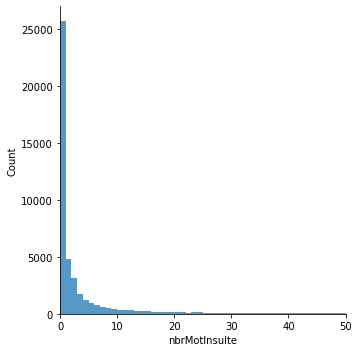

In [77]:
import seaborn as sns
ax=sns.displot(df, x="nbrMotInsulte", binwidth=1)
ax.set(xlim=(0, 50))

Afin de comprendre la relation entre les variables de notre base des données, on calcul la matrice de corrélation

In [78]:
def correlation_matrix(df):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    plt.figure()
    sns.heatmap(corr, mask=mask, cmap=cmap)
    plt.show()

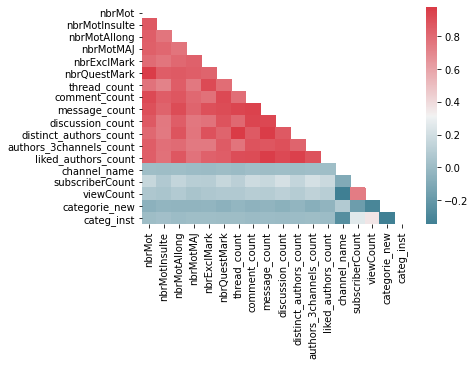

In [79]:
correlation_matrix(df)

On se focalise sur notre variable cible et on trie les corrélation en ordre descendant

In [80]:
matrix_corr=df.corr()
matrix_corr['nbrMotInsulte'].sort_values(ascending=False)

nbrMotInsulte              1.000000
nbrMot                     0.871491
nbrQuestMark               0.854249
comment_count              0.853120
message_count              0.834391
nbrMotMAJ                  0.819455
authors_3channels_count    0.788718
liked_authors_count        0.778689
nbrMotAllong               0.766110
nbrExclMark                0.763175
discussion_count           0.753119
distinct_authors_count     0.750171
thread_count               0.718392
subscriberCount            0.083189
viewCount                  0.057689
categ_inst                 0.025236
channel_name               0.007445
categorie_new             -0.031716
Name: nbrMotInsulte, dtype: float64

- Trois groupes de variables correlées à la target 
   - corrélations fortes (nbrMot,nbrQuestMark,comment_count,message_count,nbrMotMAJ) supérieur à 80%
   - corrélations moyennes(authors_3channels_count,liked_authors_count,nbrMotAllong,nbrExclMark,discussion_count,distinct_authors_count,thread_count) compris entre 70% et 78%
   - corrélations faibles (subscriberCount,viewCount,nbrMotInsulteMoyenne,nbrMotMoyenne,nbrQuestMarkMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne) inférieur à 8%

###### II. Mise en forme des données pour le machine learning

- Crétion de sous ensemble

In [81]:
df_ml=data

In [82]:
df_ml

video_id_court                                          video_id  \
0        Uvvsvw_wxOs  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLlV2dnN2d193eE9z   
1        mCy1ZBdttwA  VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLm1DeTFaQmR0dHdB   
2        iU3MyHMK5nU  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLmlVM015SE1LNW5V   
3        ZUim3AeURtk  VVViWjBDc3I5b3c2WGprZGQ1NDJPbWh3LlpVaW0zQWVVUnRr   
4        n5Tg2vhLCAM  VVVoWldzNlBKWTBoTkQzODRkMl9ScmhRLm41VGcydmhMQ0FN   
...              ...                                               ...   
46097    0s_hwJrt_6E  VVVmSG5fOC1laGRlbTg2ZkV2bEZnLUd3LjBzX2h3SnJ0XzZF   
46098    ktsFSiFN1VY  VVVZcFJEbmhrNUg4aDE2anBTODR1cXNBLmt0c0ZTaUZOMVZZ   
46099    -Zl5CiKdfAs  VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLi1abDVDaUtkZkFz   
46100    CyHXcpFlrTg  VVVDRHpfWFllS1dkME9JeWpwOTVkcXlRLkN5SFhjcEZsclRn   
46101    vN2AzKn58OE  VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLnZOMkF6S241OE9F   

                     channel_id  nbrMot  nbrMotInsulte  nbrMotAllong  \
0      UC9GGzAhhvhJO1hL10-BcgNA    3813             18             4   
1      UCXKJrYczY2_fJEZgFPGY0HQ      28              2             0   
2      UC9GGzAhhvhJO1hL10-BcgNA    3804             68             9   
3      UCbZ0Csr9ow6Xjkdd542Omhw       4              0             1   
4      UChZWs6PJY0hND384d2_RrhQ     737              3             1   
...                         ...     ...            ...           ...   
46097  UCfHn_8-ehdem86fEvlFg-Gw      16              0             0   
46098  UCYpRDnhk5H8h16jpS84uqsA     228              1             1   
46099  UCXKJrYczY2_fJEZgFPGY0HQ     287              2             0   
46100  UCCDz_XYeKWd0OIyjp95dqyQ     176              0             0   
46101  UC9GGzAhhvhJO1hL10-BcgNA   16608            152            66   

       nbrMotMAJ  nbrExclMark  nbrQuestMark nbrMotMoyenne  ...  \
0            145           79            60       30,2619  ...   
1              1            0             0      9,333333  ...   
2             56           75            54      27,56522  ...   
3              2            0             0             2  ...   
4             18            5             6   32,04347826  ...   
...          ...          ...           ...           ...  ...   
46097          0            3             0   5,333333333  ...   
46098          0            0             1           228  ...   
46099          3            2             0        35,875  ...   
46100          0            6             3      58,66667  ...   
46101        335          177           179      22,50407  ...   

      discussion_count distinct_authors_count authors_3channels_count  \
0                   28                     58                      47   
1                    0                      3                       1   
2                   22                     83                      49   
3                    0                      2                       0   
4                    4                     18                       7   
...                ...                    ...                     ...   
46097                0                      3                       1   
46098                0                      1                       0   
46099                0                      7                       5   
46100                1                      3                       0   
46101               48                    440                     278   

      liked_authors_count channel_name  subscriberCount  viewCount  \
0                      23   LeHuffPost           339922  225393312   
1                       0        CNEWS           189971  132125693   
2                      36   LeHuffPost           339922  225393312   
3                       0   Telegramme             2862    2481100   
4                       7    Les Echos            30010    6710737   
...                   ...          ...              ...        ...   
46097                   0  Le Parisien           149018   85536183   
46098                 

In [83]:
df_ml= df_ml.drop(['Unnamed: 27','video_id','channel_id','video_id_court'],axis=1)

In [84]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46102 entries, 0 to 46101
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   nbrMot                   46102 non-null  int64 
 1   nbrMotInsulte            46102 non-null  int64 
 2   nbrMotAllong             46102 non-null  int64 
 3   nbrMotMAJ                46102 non-null  int64 
 4   nbrExclMark              46102 non-null  int64 
 5   nbrQuestMark             46102 non-null  int64 
 6   nbrMotMoyenne            46102 non-null  object
 7   nbrMotInsulteMoyenne     46102 non-null  object
 8   nbrMotAllongMoyenne      46102 non-null  object
 9   nbrMotMAJMoyenne         46102 non-null  object
 10  nbrExclMarkMoyenne       46102 non-null  object
 11  nbrQuestMarkMoyenne      46102 non-null  object
 12  thread_count             46102 non-null  int64 
 13  comment_count            46102 non-null  int64 
 14  message_count            46102 non-nul

In [85]:
# conversion de certaines variables en float
def remove_type(df,feature):
    for _, c in enumerate(feature):
        df[c]=df[c].str.replace(',','.').astype(float)
    return df

In [86]:
features=['nbrMotInsulteMoyenne','nbrMotMoyenne','nbrMotAllongMoyenne',
        'nbrMotMAJMoyenne','nbrExclMarkMoyenne','nbrQuestMarkMoyenne']

In [87]:
df_ml=remove_type(df_ml,features)

In [88]:
for col in df_ml.select_dtypes('object'):
    print(f'{col :-<50} {df_ml[col].unique()}')

channel_name-------------------------------------- ['LeHuffPost' 'CNEWS' 'Telegramme' 'Les Echos' 'Sud Ouest'
 'Corse-Matin Presse' 'Gala' 'franceinfo' 'Obs' 'Le Figaro' 'Lequipe'
 'StreetPress' 'La Provence' 'Ouest-France' 'La Voix du Nord' 'Le Monde'
 'Le Parisien' 'Paris Match' 'Lundi Matin' 'Famille_chretienne'
 'Mediapart' 'Corse Net Infos' 'La Croix' 'Le Point' 'Rue89' 'TVLaTribune'
 'Courrier international' 'France-Soir' 'Acrimed' 'LCI' 'Humanite'
 '20MinutesFR' 'Nice_Matin' 'AgoraVoxFrance' 'Dauphine_libere' "L'Express"
 'hors_serie' 'metronews' 'Valeurs Actuelles' 'Le Monde diplomatique'
 'Causeur' 'Redaction JOL Press' 'France Net Infos journal'
 'la_bas_si_jy_suis' 'Lutte_ouvriere' 'Slate.fr' 'Reporterre. Net'
 'La Manche Libre' 'Fakirpresse' 'arret_sur_image' 'Orient XXI'
 'Lib̃�ration' 'Contre Info' 'Alternatives Economiques Officiel'
 'AtlanticoFr' "DNA - Dernĩ�_res Nouvelles d'Alsace" 'Fdesouche'
 'ZDNet.fr']
categorie_new------------------------------------- ['Core' 'Ni

In [89]:
# cette fonction recupère les variables quantitatives dont la corrélation avec notre target est supérieur à 71%
def feature_use(df):
    df_num = df.select_dtypes(include=np.number)
    corr = df_num.corr()
    use_colomn=list(df_num.columns[corr['nbrMotInsulte']>=0.718392 ]) 
    cat_colomns=list(df.select_dtypes('object'))
    return df[use_colomn+cat_colomns]

In [90]:
df_ml=feature_use(df_ml)

In [91]:
df_ml

nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  nbrExclMark  \
0        3813             18             4        145           79   
1          28              2             0          1            0   
2        3804             68             9         56           75   
3           4              0             1          2            0   
4         737              3             1         18            5   
...       ...            ...           ...        ...          ...   
46097      16              0             0          0            3   
46098     228              1             1          0            0   
46099     287              2             0          3            2   
46100     176              0             0          0            6   
46101   16608            152            66        335          177   

       nbrQuestMark  comment_count  message_count  discussion_count  \
0                60             81            126                28   
1                 0              0              3                 0   
2                54             86            138                22   
3                 0              0              2                 0   
4                 6              6             23                 4   
...             ...            ...            ...               ...   
46097             0              0              3                 0   
46098             1              0              1                 0   
46099             0              0              8                 0   
46100             3              1              3                 1   
46101           179            471            738                48   

       distinct_authors_count  authors_3channels_count  liked_authors_count  \
0                          58                       47                   23   
1                           3                        1                    0   
2                          83                       49                   36   
3                           2                        0                    0   
4                          18                        7                    7   
...                       ...                      ...                  ...   
46097                       3                        1                    0   
46098                       1                        0                    0   
46099                       7                        5                    3   
46100                       3                        0                    1   
46101                     440                      278                  141   

      channel_name categorie_new        categ_inst  
0       LeHuffPost          Core      Pure Players  
1            CNEWS          Core                TV  
2       LeHuffPost          Core      Pure Players  
3       Telegramme         Niche  Presse_regionale  
4        Les Echos          Core  Presse nationale  
...            ...           ...               ...  
46097  Le Parisien          Core  Presse_regionale  
46098     Le Monde          Core  Presse nationale  
46099        CNEWS          Core                TV  
46100    Le Figaro          Core  Presse nationale  
46101   LeHuffPost          Core      Pure Players  

[46102 rows x 15 columns]

##### 1. Préprocessing

###### a. Split data

- Nous avons divisé notre jeu de données en deux sous ensembles de train et test dont la taille du train est égal à 80% des données initiales et la taille de celle de test est 20% .

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
trainset, testset = train_test_split(df_ml, test_size=0.2, random_state=0)

In [101]:
#la taille des données d'entrainement où 36881 est le nombre de lignes et 24 le nombre des colonnes
trainset.shape

(36881, 15)

In [102]:
#la taille des données de test avec 9221 lignes et 24 colonnes
testset.shape

(9221, 15)

###### b. Encodage des variables qualitatives 

L'intérêt de cette partie est d'utiliser la librairie sklearn pour encoder les données catégorielles.
Nous avons exécuté les codes suivants en gardant la dataset originale, où les colonnes channel_name, categorie_new et categ_inst sont de type catégoriel

In [103]:
#from sklearn.preprocessing import OneHotEncoder
def encodage(df): 
    data_dummies = pd.get_dummies(df, prefix=['ChN','CaN','CaI'], columns=['channel_name','categorie_new','categ_inst'])
    #display(data_dummies.columns)
    return data_dummies

In [104]:
encodage(df_ml)

nbrMot  nbrMotInsulte  nbrMotAllong  nbrMotMAJ  nbrExclMark  \
0        3813             18             4        145           79   
1          28              2             0          1            0   
2        3804             68             9         56           75   
3           4              0             1          2            0   
4         737              3             1         18            5   
...       ...            ...           ...        ...          ...   
46097      16              0             0          0            3   
46098     228              1             1          0            0   
46099     287              2             0          3            2   
46100     176              0             0          0            6   
46101   16608            152            66        335          177   

       nbrQuestMark  comment_count  message_count  discussion_count  \
0                60             81            126                28   
1                 0              0              3                 0   
2                54             86            138                22   
3                 0              0              2                 0   
4                 6              6             23                 4   
...             ...            ...            ...               ...   
46097             0              0              3                 0   
46098             1              0              1                 0   
46099             0              0              8                 0   
46100             3              1              3                 1   
46101           179            471            738                48   

       distinct_authors_count  ...  ChN_metronews  CaN_Core  CaN_Niche  \
0                          58  ...              0         1          0   
1                           3  ...              0         1          0   
2                          83  ...              0         1          0   
3                           2  ...              0         0          1   
4                          18  ...              0         1          0   
...                       ...  ...            ...       ...        ...   
46097                       3  ...              0         1          0   
46098                       1  ...              0         1          0   
46099                       7  ...              0         1          0   
46100                       3  ...              0         1          0   
46101                     440  ...              0         1          0   

       CaN_Partisan  CaI_Alternatif  CaI_Presse magazine  \
0                 0               0                    0   
1                 0               0                    0   
2                 0               0                    0   
3                 0               0                    0   
4                 0               0                    0   
...             ...             ...                  ...   
46097             0               0                    0   
46098             0               0                    0   
46099             0               0                    0   
46100             0               0                    0   
46101             0               0                    0   

       CaI_Presse nationale  CaI_Presse_regionale  CaI_Pure Players  CaI_TV  
0                         0                     0                 1       0  
1                         0                     0                 0       1  
2                         0                     0                 1       0  
3                         0                     1                 0       0  
4                         1                     0                 0       0  
...                     ...                   ...               ...     ...  
46097                     0                     1                 0       0  
46098                     1                     0                 0       0  
4

##### Nettoyage des données

Comme nous avons déjà vu dans la première partie, nous avons des valeurs aberrantes qu'il faut supprimer :

Suppression des lignes où le nombre d'insultes est supérieur au nombres de mots

In [105]:
#  nombr=df['nbrMot']/df['nbrMotMoyenne']
 #   df.insert(1,'nbrPerComment',nombr,True) # nombre de personne ayant commenté la vidéo sur la chaine
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
def delete_row(df):
    df=df[df['nbrMot']>0] # reccupère que les vidéos n'ayant été commentées
    df=df[df['nbrMot']>df['nbrMotInsulte']] #  supprime vidéo où le nombre d'insultes est supérieur au nombres de mots
  
    return df

On standardise par la suite les 2 groupes de donnée : entrainement et test

In [106]:
#Fonction de Standardisation
def preprocessing(df):
    
    df = encodage(df)
    df = delete_row(df)
    
    X = df.drop('nbrMotInsulte', axis=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = df['nbrMotInsulte']
    
    return X, y

In [107]:
X_train, y_train = preprocessing(trainset)


In [108]:
X_train.shape

(36841, 78)

In [109]:
y_train.shape

(36841,)

In [111]:
X_test,y_test=preprocessing(df_ml)

#####  c. Machine learning algo

Importation des librairies nécessaires pour l'exécution des algorithmes de ML

In [112]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor 
# deep_model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest

# metric

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#optimisation

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###### Recherche d'hyperparamètre

Afin d'obtenir un modèle optimal pour l'algorithme KNN regression, nous avons utilisé la fonction GridSearchCV pour déterminer la valeur optimal de K qui va nous donner un modèle avec la valeur la plus minimal pour l'erreur : 'Mean squared error'

In [113]:
knn_params={'n_neighbors':list(range(1,20)),
            #'p':[1,2]   
}
print("Best model KNN Regressor")
knn = GridSearchCV(KNeighborsRegressor(), knn_params, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')
knn.fit(X_train, y_train)
print(knn.best_params_)
cvres = knn.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


Best model KNN Regressor
{'n_neighbors': 2}
38.13037409769392 {'n_neighbors': 1}
32.31143607025496 {'n_neighbors': 2}
32.84089667713518 {'n_neighbors': 3}
34.78753425701574 {'n_neighbors': 4}
35.86549661998729 {'n_neighbors': 5}
36.59618999566572 {'n_neighbors': 6}
37.301010409883524 {'n_neighbors': 7}
38.560171372454434 {'n_neighbors': 8}
39.48933008273484 {'n_neighbors': 9}
39.61562415054306 {'n_neighbors': 10}
39.93194298748383 {'n_neighbors': 11}
40.50066195927973 {'n_neighbors': 12}
40.561117256431885 {'n_neighbors': 13}
41.00100956692136 {'n_neighbors': 14}
41.42274623525872 {'n_neighbors': 15}
41.50449302726371 {'n_neighbors': 16}
41.69446912095507 {'n_neighbors': 17}
41.9918832461872 {'n_neighbors': 18}
42.09815785646735 {'n_neighbors': 19}


D'après nos résultat, la valeur la plus optimale pour K est 2

Par la suite, on détermine les meilleurs paramètres pour l'algorithme SVM
Avec C correspondant à la pénalité

In [ ]:
svm_params={}

svm_params = {'kernel':['linear', 'rbf', 'poly'],
            'C':[0.1, 0.5, 1]}

print("Best model SVM Regressor")
svm = GridSearchCV(SVR(), svm_params, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')
svm.fit(X_train, y_train)
print(svm.best_params_)
print(svm.best_estimator_)

In [114]:
svm.cv_results_

{'mean_fit_time': array([0.05903122, 0.0630255 ]),
 'std_fit_time': array([0.00957475, 0.00502614]),
 'mean_score_time': array([28.41162741,  5.58118372]),
 'std_score_time': array([3.35340793, 0.87140166]),
 'param_n_neighbors': masked_array(data=[1, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1, 'p': 1}, {'n_neighbors': 1, 'p': 2}],
 'split0_test_score': array([-636.49416554, -637.13839891]),
 'split1_test_score': array([-3109.58740499, -3136.99457112]),
 'split2_test_score': array([-503.31243214, -524.41585233]),
 'split3_test_score': array([-1021.69191097, -1036.56134636]),
 'split4_test_score': array([-1294.35939197, -1388.09771987]),
 'split5_test_score': array([-513.752443  , -486.75651466]),
 'split6_test_score': array([-738.2937025 , -735.45928339]),
 'split7_test_score': array([-

##### Procédure d'évaluation

Afin d'evaluer par la suite la performance de nos modèles de ML, nous créeons une fonction d'evaluation qui calculera l'erreur moyennes absolue et la précision pour chacun des modèle 

In [114]:
def evaluation(model) :
    res = {}
    if model=='deep':
        deep.fit(x=X_train,
                    y=y_train,
                    epochs=20,
                    batch_size=100,
                    callbacks = [ModelCheckpoint("deep.h5",
                                      monitor='loss',
                                      save_best_only=True,
                                      mode='min', 
                                      verbose=0)])
        ypred= deep.predict(X_test)
        res[model] = [mean_absolute_error(y_test, ypred),
                     np.sqrt(mean_squared_error(y_test, ypred)),
                     r2_score(y_test, ypred)]
        print(pd.DataFrame(res[model], index=['MAE', 'RMSE', 'R2']))
        
    else:
        model.fit(X_train, y_train)
        ypred = model.predict(X_test)
        res[model] = [mean_absolute_error(y_test, ypred),
                     np.sqrt(mean_squared_error(y_test, ypred)),
                     r2_score(y_test, ypred)]
        print(pd.DataFrame(res[model], index=['MAE', 'RMSE', 'R2']))


##### Modélisation

Modélisation avec les meilleurs hyperparamètres en utilisant les algorithmes : 
 - Forêt aléatoire (régression)
 - L'arbre de décision (régression)
 - le gradient boosting
 - La régression linéaire
 - SVM
 - regression KNN
 - La régression logistique
 - Deep learning
 
 On calcule par la suite les erreurs et la précision de chacun de ces algorithmes pour définir le mieux adapté à notre jeu de donnée
 

In [115]:
RandomForest = RandomForestRegressor(random_state=0)
tree_reg = DecisionTreeRegressor(random_state=0)
gbr_reg = GradientBoostingRegressor(random_state=0)
lin_reg = LinearRegression()
SVM =  SVR(kernel="linear")
KNN = KNeighborsRegressor(n_neighbors=2)
logreg=LogisticRegression()
# deep model
deep = Sequential()
deep.add(Dense(input_dim=X_train.shape[1], units=64))
deep.add(Dense(units=32))
deep.add(Dense(units=1))

print(deep.summary())
deep.compile(optimizer="adam", loss="mse", metrics="mse")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                5056      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
_________________________________________________________________
None


In [116]:
dict_of_models = {'RandomForest': RandomForest,
                  'Arbre de Décision' : tree_reg,
                  'SVM': SVM,
                  'KNN': KNN,
                  'Gradient Boosting': gbr_reg ,
                  'Modèle Linéaire':lin_reg,
                  'Régression Logistique':logreg,
                  'deep Learning':deep
                  
                 }


In [117]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)
    print('---------------------------------------------------------------------')

RandomForest
              0
MAE    2.612531
RMSE  18.658295
R2     0.908404
---------------------------------------------------------------------
Arbre de Décision
              0
MAE    2.423494
RMSE  20.125949
R2     0.893428
---------------------------------------------------------------------
SVM
              0
MAE    4.501337
RMSE  30.945351
R2     0.748046
---------------------------------------------------------------------
KNN
              0
MAE    2.952334
RMSE  20.336574
R2     0.891185
---------------------------------------------------------------------
Gradient Boosting
              0
MAE    3.784565
RMSE  16.875297
R2     0.925074
---------------------------------------------------------------------
Modèle Linéaire
                 0
MAE   3.678739e+10
RMSE  7.494473e+10
R2   -1.477792e+18
---------------------------------------------------------------------
Régression Logistique


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              0
MAE    3.948447
RMSE  20.777095
R2     0.886420
---------------------------------------------------------------------
deep Learning
1152/1152 [==============================] - 3s 2ms/step - loss: 2189.4961 - mse: 2189.4961
              0
MAE    5.967373
RMSE  36.177396
R2     0.655645
---------------------------------------------------------------------


D'après le résultat de la focntion d'évaluation, nous remarquons que le meilleur algorithme pour notre base de données est le gradient boosting :
MAE    3.784565
RMSE  16.875297
R2     0.925074

Nous avons lancé l'algorithme en gardant les hyperparamètre par défault. Par la suite, on va essayer d'optimiser cet algorithme en cherchant d'autres hyperparamètres pour l'améliorer

##### Optimisation

In [118]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [119]:
gbr_reg

GradientBoostingRegressor(random_state=0)

In [120]:
# Ici nous définissons plusieurs valeurs de nos hyperpamètres afin de tester et déterminer le best
hyper_params = {'learning_rate':[0.1,0.05,0.02],
                'n_estimators':[100,200]}

In [121]:
grid = RandomizedSearchCV(gbr_reg, param_distributions=hyper_params, scoring='neg_mean_squared_error', cv=4,
                          n_iter=40,random_state=0)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

res_best= [mean_absolute_error(y_test, y_pred),
                     np.sqrt(mean_squared_error(y_test, y_pred)),
                     r2_score(y_test, y_pred)]
print(pd.DataFrame(res_best, index=['MAE', 'RMSE', 'R2']))



/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=40. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 200, 'learning_rate': 0.05}
              0
MAE    3.762480
RMSE  16.919431
R2     0.924681


In [122]:
evaluation(grid.best_estimator_)

              0
MAE    3.762480
RMSE  16.919431
R2     0.924681


- conclusion
  - on obtient un score de 92% avec le gradient boosting 
  - meilleur hyperparamètres: 'n_estimators': 200, 'learning_rate': 0.05 et les autres par défaut